In [1]:
import pandas as pd
df=pd.read_csv("C:/Personal/Susi/Barcelona_Activa/Project/Dataset/ai_job_dataset.csv")

In [2]:
df1 = df.copy()

In [3]:
df1.head()

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

In [10]:
df1.isnull().sum().sum()

0

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
three_blue_palette = [
  "#5DADE2",  
  "#E8A2B8",  
  "#6FBF73",  
  "#E67E22",  
  "#C9A227",  
  "#34495E",  
  "#7F8C8D",  
  "#2C3E50"   
]
sns.set_palette(three_blue_palette)
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "legend.title_fontsize": 11,
    "axes.edgecolor": "#333333",
    "grid.alpha": 0.3
})


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
How do AI salaries vary across different countries and regions?

In [20]:
country_salary = (
    df.groupby("company_location")["salary_usd"]
      .mean()
      .sort_values(ascending=False)
)


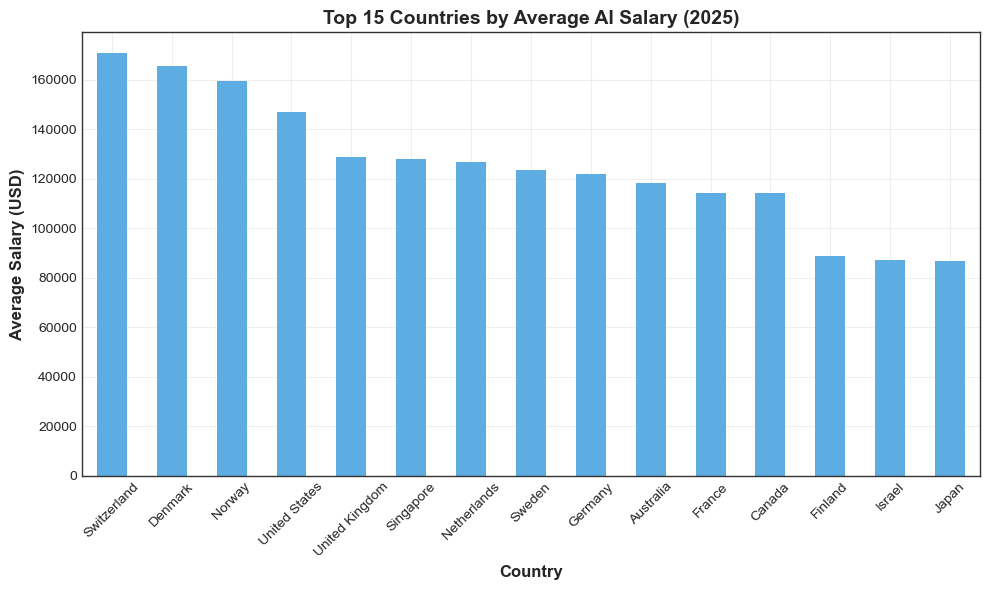

In [22]:
import matplotlib.pyplot as plt

top_15 = country_salary.head(15)

plt.figure(figsize=(10,6))
top_15.plot(kind="bar")
plt.title("Top 15 Countries by Average AI Salary (2025)")
plt.ylabel("Average Salary (USD)")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_salary_top_countries", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
Which countries offer the highest-paying AI jobs in 2025?

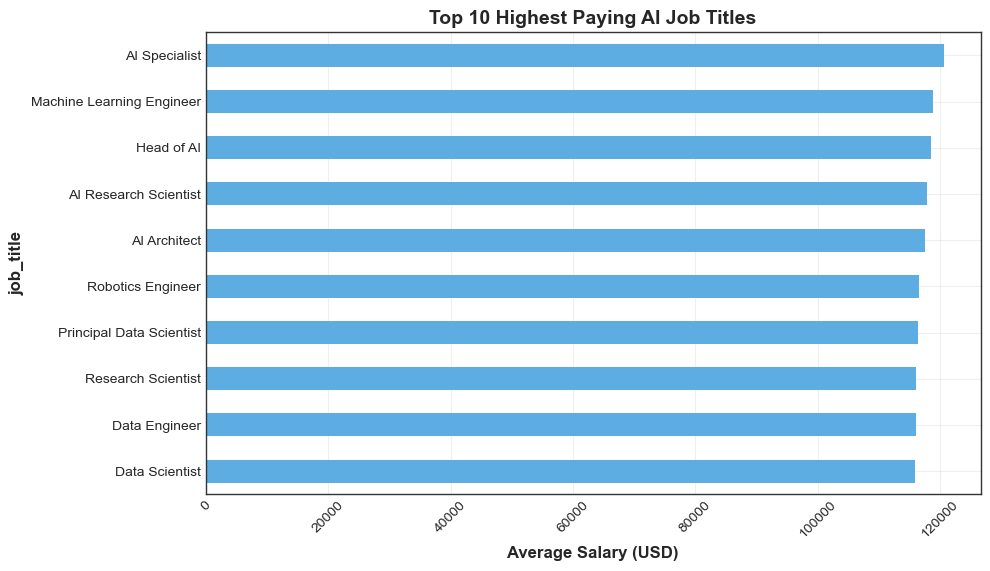

In [61]:
job_salary = (
    df.groupby("job_title")["salary_usd"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
      .sort_values()
)

job_salary.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Highest Paying AI Job Titles")
plt.xlabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_salary_high_pay", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
How does experience level impact AI job salaries globally?

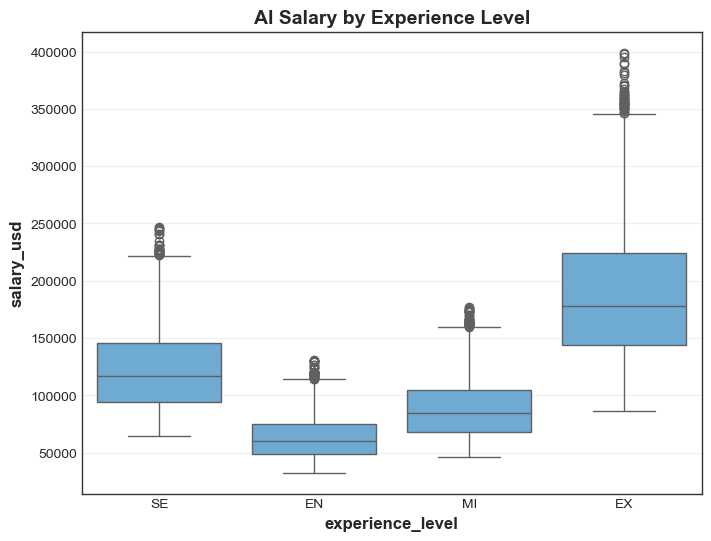

In [31]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="experience_level", y="salary_usd")
plt.title("AI Salary by Experience Level")
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_salary_experience", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
What is the relationship between years of experience and salary growth?

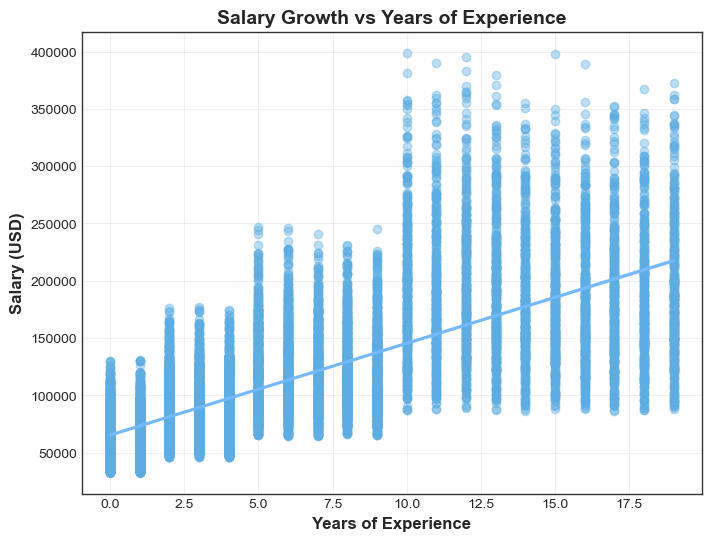

In [33]:
plt.figure(figsize=(8,6))
sns.regplot(
    data=df,
    x="years_experience",
    y="salary_usd",
    scatter_kws={"alpha":0.4},
    line_kws={"color":"#74b9ff"}
)

plt.title("Salary Growth vs Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary (USD)")
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_salary_growth_experience", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
6.	Does higher education requirement lead to higher AI salaries?

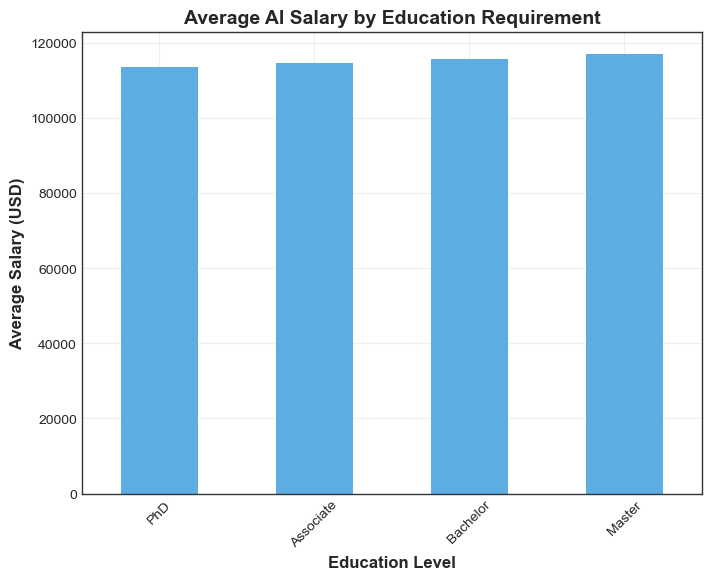

In [35]:
edu_salary = (
    df.groupby("education_required")["salary_usd"]
      .mean()
      .sort_values()
)

edu_salary.plot(kind="bar", figsize=(8,6))
plt.title("Average AI Salary by Education Requirement")
plt.xlabel("Education Level")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
	Which AI job roles are most in demand globally?

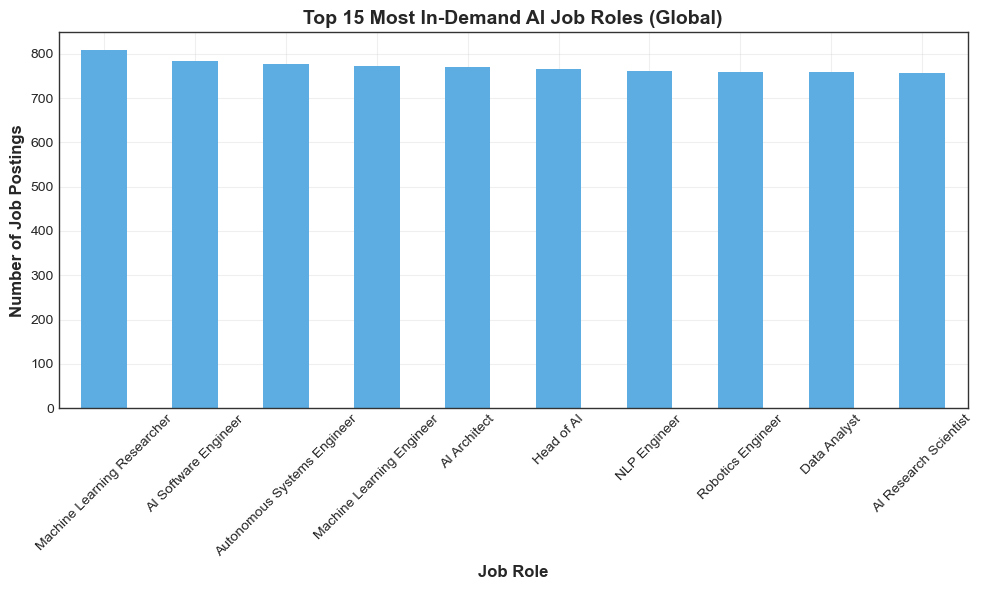

In [37]:
top_roles = (
    df["job_title"]
    .value_counts()
    .head(10)
)

plt.figure(figsize=(10,6))
top_roles.plot(kind="bar")
plt.title("Top 15 Most In-Demand AI Job Roles (Global)")
plt.xlabel("Job Role")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_Demand_Job_Roles", dpi=300, bbox_inches="tight")
plt.show()

In [ ]:
8.	Which AI roles command the highest salaries?

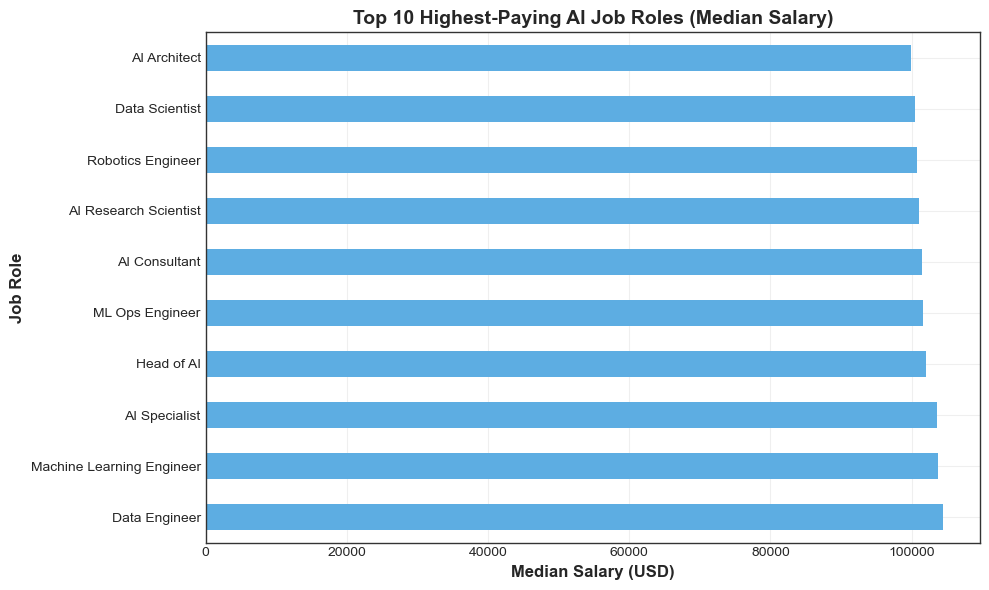

In [39]:
top_paying_roles = (
    df.groupby("job_title")["salary_usd"]
      .median()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,6))
top_paying_roles.plot(kind="barh")
plt.title("Top 10 Highest-Paying AI Job Roles (Median Salary)")
plt.xlabel("Median Salary (USD)")
plt.ylabel("Job Role")
plt.tight_layout()
plt.show()


In [ ]:
How does remote work availability affect AI job salaries?

In [41]:
def remote_type(x):
    if x == 0:
        return "On-site"
    elif x == 100:
        return "Fully Remote"
    else:
        return "Hybrid"

df["remote_type"] = df["remote_ratio"].apply(remote_type)

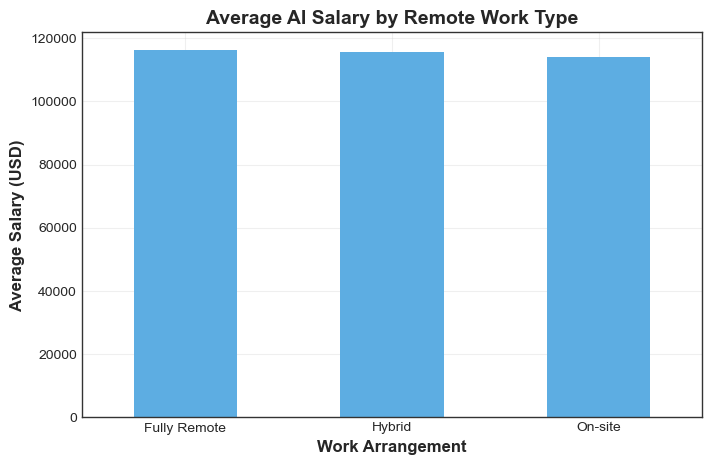

In [43]:
remote_salary_mean = (
    df.groupby("remote_type")["salary_usd"]
      .mean()
)

remote_salary_mean.plot(
    kind="bar",
    figsize=(8,5)
)

plt.title("Average AI Salary by Remote Work Type")
plt.xlabel("Work Arrangement")
plt.ylabel("Average Salary (USD)")
plt.xticks(rotation=0)
plt.savefig(r"C:\Personal\Susi\Barcelona_Activa\Project\OutputImage\ai_salary_Remote", dpi=300, bbox_inches="tight")
plt.show()
